___
# Ciência dos Dados - PROJETO 2

___
## Alan singer

## Ricardo Peres

## Victor Vazquez

___

___

## 1. Problema

O Classificador Naive-Bayes, o qual se baseia no uso do teorema de Bayes, é largamente utilizado em filtros anti-spam de e-mails. O classificador permite calcular qual a probabilidade de uma mensagem ser SPAM considerando as palavras em seu conteúdo e, de forma complementar, permite calcular a probabilidade de uma mensagem ser HAM dada as palavras descritas na mensagem.

Para realizar o MVP (minimum viable product) do projeto, você precisa programar uma versão do classificador que "aprende" o que é uma mensagem SPAM considerando uma base de treinamento e comparar o desempenho dos resultados com uma base de testes. 


___
## 2. Separação da base de dados em Treinamento e Teste

A base de dados deve ser separada em duas partes, aleatoriamente, considerando: 
    
    75% dos dados para a parte Treinamento; e
    25% dos dados para a parte Teste.

In [28]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Clóvis Ricardo Peres\Documents\Cdados\Projeto2Dados\p2


In [3]:
dados = pd.read_excel('spamham2019(1).xlsx')

In [33]:
dados.head(5)
len(dados)

5572

In [5]:
train = dados[int(len(dados)*0.25):]
teste = dados[:int(len(dados)*0.25)]

**Limpando a base de teste:**

In [6]:
teste_email = teste["Email"].str.lower().str.replace(',', '').str.replace('.', '').str.replace('?', '').str.replace('!', '')\
.str.replace('#', '').str.replace('||', '').str.replace('|', '').str.replace('//', '').str.replace('', '')\
.str.replace('"', "").str.replace('\n', "").str.replace('-', "").str.replace(']', "").str.replace('[', "")\
.str.replace('(', "").str.replace(')', "").str.replace('=', "").str.replace('*', "").str.replace('/', "")\
.str.replace('&', "").str.replace('$', "").str.replace('%', "").str.replace('ˆ', "").str.replace('*', "")\
.str.replace(';', "").str.replace(':', "").str.replace('  ', "").str.replace('   ', "").str.replace('    ', "")\
.str.replace('\\', "").str.replace('_', "")
teste = pd.concat([teste_email,teste["Class"]],axis=1)

**Limpando a base de teste e separando em ham e spam:**

In [7]:
train_email = train["Email"].str.lower().str.replace(',', '').str.replace('.', '').str.replace('?', '').str.replace('!', '')\
.str.replace('#', '').str.replace('||', '').str.replace('|', '').str.replace('//', '').str.replace('', '')\
.str.replace('"', "").str.replace('\n', "").str.replace('-', "").str.replace(']', "").str.replace('[', "")\
.str.replace('(', "").str.replace(')', "").str.replace('=', "").str.replace('*', "").str.replace('/', "")\
.str.replace('&', "").str.replace('$', "").str.replace('%', "").str.replace('ˆ', "").str.replace('*', "")\
.str.replace(';', "").str.replace(':', "").str.replace('  ', "").str.replace('   ', "").str.replace('    ', "")\
.str.replace('\\', "").str.replace('_', "")

train_email_limpo = pd.concat([train_email,train["Class"]],axis=1)
train_ham_limpo = train_email_limpo[train_email_limpo.Class == "ham"]
train_spam_limpo = train_email_limpo[train_email_limpo.Class == "spam"]

**Plotando cada base definida e limpa acima**

In [8]:
train_email_limpo.head(5) 

,Email,Class
1393,oh ok,ham
1394,r we still meeting 4 dinner tonight,ham
1395,thats cool i am a gentleman and will treat you...,ham
1396,shall i start from hear,ham
1397,then we wait 4 u lor no need 2 feel bad lar,ham


In [9]:
train_ham_limpo.head(5)

,Email,Class
1393,oh ok,ham
1394,r we still meeting 4 dinner tonight,ham
1395,thats cool i am a gentleman and will treat you...,ham
1396,shall i start from hear,ham
1397,then we wait 4 u lor no need 2 feel bad lar,ham


In [10]:
train_spam_limpo.head(5)

,Email,Class
1406,urgent important information for o2 user today...,spam
1413,dear u've been invited to xchat this is our fi...,spam
1422,congratulations ur awarded either å£500 of cd ...,spam
1429,for salearsenal dartboard good condition but n...,spam
1443,free 1st week entry 2 textpod 4 a chance 2 win...,spam


**Printando o tamanho de cada base:**

In [11]:
print("Base Limpa: {0}".format(len(train_email_limpo)))

Base Limpa: 4179


In [12]:
print("Base Ham: {0}".format(len(train_ham_limpo)))

Base Ham: 3634


In [13]:
print("Base Spam: {0}".format(len(train_spam_limpo)))

Base Spam: 545


___
## 3. Classificador Naive-Bayes

** Com todas as mensagens limpas foram criadas listas de palavras e de frases que foram completas através do código abaixo. Essas listas foram utilizadas para a criação de um dataset das palavras para que a probabilidade de aparição de cada palavra pudesse ser calulada (P(palavra)). E então após o cálculo das probabilidade as mesmas foram adicionadas a base contendo todas as palavras, a quantidade de vezes que cada uma aparece e a sua probabilidade de aparecer. Esses mesmo passos foram realizados para as palavras presentes em Ham e em Spam, para que pudessem ser calculadas as P(palavra/Ham) e P(palavra/Spam), porem somente com as palavras presentes em ham e em spam. **

**Base toda:**

In [14]:
frases = []
palavras = []
for frase in train_email_limpo.Email:
    frases.append(frase.split(" "))
    
for e in frases:
    for palavra in e:
        palavras.append(palavra)
        
len(palavras)

62871

In [15]:
qp_email = pd.DataFrame(data = palavras)
qp_email.columns = ["Palavras"]
q = qp_email["Palavras"].value_counts()
##################################################################################################################
qp_frame = q.to_frame()
qp_frame = q.reset_index()
qp_frame.columns = ["Palavras", "Quantidade"]
qp_frame["Probabilidade"] = 0
###############################################################################################
prob = []
for i in range(len(qp_frame)): 
    prob.append((qp_frame["Quantidade"][i]/len(qp_frame))*100)
###############################################################################################
print("GERAL: ")
qp_frame["Probabilidade"] = prob
qp_frame.head(5)

GERAL: 


,Palavras,Quantidade,Probabilidade
0,to,1649,18.936610
1,i,1575,18.086817
2,you,1508,17.317409
3,a,1059,12.161231
4,the,969,11.127699


**Base ham:**

In [16]:
frases_ham = []
palavras_ham = []
for frase in train_ham_limpo.Email:
    frases_ham.append(frase.split(" "))
for e in frases_ham:
    for palavra in e:
         palavras_ham.append(palavra)

In [17]:
qp_ham_email = pd.DataFrame(data = palavras_ham)
qp_ham_email.columns = ["Palavras"]
q_ham = qp_ham_email["Palavras"].value_counts()
##################################################################################################################
qp_ham_frame = q_ham.to_frame()
qp_ham_frame = q_ham.reset_index()
qp_ham_frame.columns = ["Palavras", "Quantidade"]
qp_ham_frame["Probabilidade"] = 0
###############################################################################################
prob_ham = []
for i in range(len(qp_ham_frame)): 
    prob_ham.append((qp_ham_frame["Quantidade"][i]/len(qp_ham_frame))*100)
###############################################################################################
print("HAM: ")
qp_ham_frame["Probabilidade"] = prob_ham
qp_ham_frame.head(5)

HAM: 


,Palavras,Quantidade,Probabilidade
0,i,1544,22.507289
1,you,1309,19.081633
2,to,1147,16.720117
3,the,818,11.924198
4,a,774,11.282799


**Base spam:**

In [18]:
frases_spam = []
palavras_spam = []
for frase in train_spam_limpo.Email:
    frases_spam.append(frase.split(" "))
for e in frases_spam:
    for palavra in e:
         palavras_spam.append(palavra)

In [19]:
qp_spam_email = pd.DataFrame(data = palavras_spam)
qp_spam_email.columns = ["Palavras"]
q_spam = qp_spam_email["Palavras"].value_counts()
##################################################################################################################
qp_spam_frame = q_spam.to_frame()
qp_spam_frame = q_spam.reset_index()
qp_spam_frame.columns = ["Palavras", "Quantidade"]
qp_spam_frame["Probabilidade"] = 0
###############################################################################################
prob_spam = []
for i in range(len(qp_spam_frame)): 
    prob_spam.append((qp_spam_frame["Quantidade"][i]/len(qp_spam_frame))*100)
###############################################################################################
print("SPAM: ")
qp_spam_frame["Probabilidade"] = prob_spam
qp_spam_frame.head(5)

SPAM: 


,Palavras,Quantidade,Probabilidade
0,to,502,18.476261
1,a,285,10.489510
2,call,256,9.422157
3,your,202,7.434671
4,you,199,7.324255


** Sabendo o tamanho da base e o tamanho da base de spam e de ham é possível calcular a P(ham) e a P(spam), que serão utilizadas posteriormente para o outros cálculos **

In [20]:
prob_spam = (len(train_spam_limpo)*100)/len(train_email_limpo)
prob_ham = (len(train_ham_limpo)*100)/len(train_email_limpo)
print("Tamanhos: Completo = {0}, Ham = {1}, Spam = {2}".format( len(train_email_limpo),len(train_ham_limpo), len(train_spam_limpo)))
print("")
print("Probabilidades: Ham = {0}%, Spam = {1}%".format(prob_ham, prob_spam))

Tamanhos: Completo = 4179, Ham = 3634, Spam = 545

Probabilidades: Ham = 86.95860253649198%, Spam = 13.041397463508016%


**Agora com as probabilidades previamente calculadas é possível descobrir a probabilidade de cada frase e a probabilidade de cada frase dado ham e spam, utilizando o método de laplace em que mesmo se a palavra nao estiver dentro de ham ou de spam a probabilidade nao sera zerada, pois para o calculo da mesma sempre adiciona-se 1 a probabilidade de cada palavra dado ham ou spam.**

p(ham/mensagem)=(p(mensagem/ham)*p(ham))

p(spam/mensagem)=(p(mensgem/spam)*p(spam))


p(mensagem/ham)=(1pm+1)/(len(ham)+len(total_semrepetir)) *(2pm)...)

p(mensagem/spam)=(1pm)+1)/len(spam)+len(total_semrepetir)) *(2pm)...)

In [21]:
def prob_laplanche(frase, typ, palavras):

    frase_nv = frase.split(" ")
    qnt = [1]*len(frase_nv)
    val = 1

    for i in range(len(frase_nv)):
        if frase_nv[i] in typ.Palavras.values.tolist():
            
            qnt[i] += typ.Quantidade[typ.loc[typ["Palavras"] == frase_nv[i]].index[0]]
    
    prob = [i/(len(palavras) + len(qp_frame)) for i in qnt]
    for r in prob: val *= r 
    return val*prob_ham/100 if len(typ) == len(qp_ham_frame) else float(val)*prob_spam/100

In [34]:
def front(teste):
    PF = 0
    FN = 0
    FV = 0
    PV = 0

    for i in range(len(teste)):
        a = prob_laplanche(teste.Email[i], qp_ham_frame, palavras_ham)
        ac = prob_laplanche(teste.Email[i], qp_spam_frame, palavras_spam)

        comp = "ham" if a > ac else "spam"
    
        if comp == "spam" and teste.Class[i] != comp:
            PF += 1 

        if comp == "ham" and teste.Class[i] !=comp:
            FN += 1

        if comp == "ham" and teste.Class[i] == comp:
            FV += 1

        if comp == "spam" and teste.Class[i] == comp:
            PV += 1

        
    return PF/len(teste),PV/len(teste),FV/len(teste),FN/len(teste), (FV + PV)/len(teste)

In [35]:
front(teste)

(0.024407753050969132,
 0.01148600143575018,
 0.8305814788226848,
 0.13352476669059585,
 0.842067480258435)

In [24]:
len(teste)

1393

## 4. Qualidade do Classificador alterando a base de treinamento

repetindo todo o processo 10 mil vezes, passo 4 do arquivo do projeto no bb

In [25]:
def back(teste):
    porce = 0
    for i in range(len(teste)):
        
        a = prob_laplanche(teste.Email[i], qp_ham_frame, palavras_ham)
        ac = prob_laplanche(teste.Email[i], qp_spam_frame, palavras_spam)

        comp = "ham" if a > ac else "spam"
    
        if (comp == "spam" and teste.Class[i] == comp) or (comp == "ham" and teste.Class[i] == comp):
            porce += 1

        
    return porce/len(teste)

In [26]:
percentual = []

for i in range(8):
    l = dados.sample(frac=1)
    train_10000 = l[int(len(l)*0.25):].reset_index().drop(['index'], axis=1)
    teste_10000 = l[:int(len(l)*0.25)].reset_index().drop(['index'], axis=1)
    ##########################
    teste_email_10000 = teste_10000["Email"].str.lower().str.replace(',', '').str.replace('.', '').str.replace('?', '').str.replace('!', '')\
    .str.replace('#', '').str.replace('||', '').str.replace('|', '').str.replace('//', '').str.replace('', '')\
    .str.replace('"', "").str.replace('\n', "").str.replace('-', "").str.replace(']', "").str.replace('[', "")\
    .str.replace('(', "").str.replace(')', "").str.replace('=', "").str.replace('*', "").str.replace('/', "")\
    .str.replace('&', "").str.replace('$', "").str.replace('%', "").str.replace('ˆ', "").str.replace('*', "")\
    .str.replace(';', "").str.replace(':', "").str.replace('  ', "").str.replace('   ', "").str.replace('    ', "")\
    .str.replace('\\', "").str.replace('_', "")
    
    teste_10000 = pd.concat([teste_email_10000,teste_10000["Class"]],axis=1)
    ##########################
    train_email_10000 = train_10000["Email"].str.lower().str.replace(',', '').str.replace('.', '').str.replace('?', '').str.replace('!', '')\
    .str.replace('#', '').str.replace('||', '').str.replace('|', '').str.replace('//', '').str.replace('', '')\
    .str.replace('"', "").str.replace('\n', "").str.replace('-', "").str.replace(']', "").str.replace('[', "")\
    .str.replace('(', "").str.replace(')', "").str.replace('=', "").str.replace('*', "").str.replace('/', "")\
    .str.replace('&', "").str.replace('$', "").str.replace('%', "").str.replace('ˆ', "").str.replace('*', "")\
    .str.replace(';', "").str.replace(':', "").str.replace('  ', "").str.replace('   ', "").str.replace('    ', "")\
    .str.replace('\\', "").str.replace('_', "")
    
    train_email_limpo_10000 = pd.concat([train_email_10000,train["Class"]],axis=1)
    train_ham_limpo_10000 = train_email_limpo_10000[train_email_limpo_10000.Class == "ham"]
    train_spam_limpo_10000 = train_email_limpo_10000[train_email_limpo_10000.Class == "spam"]
    ##########################
    frases_spam = []
    palavras_spam = []

    for frase in train_spam_limpo_10000.Email:
        frases_spam.append(str(frase).split(" "))
    for e in frases_spam:
        for palavra in e:
             palavras_spam.append(palavra)

    qp_spam_email = pd.DataFrame(data = palavras_spam)
    qp_spam_email.columns = ["Palavras"]
    q_spam = qp_spam_email["Palavras"].value_counts()
    qp_spam_frame = q_spam.to_frame()
    qp_spam_frame = q_spam.reset_index()
    qp_spam_frame.columns = ["Palavras", "Quantidade"]
    
    ##################
    frases_ham = []
    palavras_ham = []
    for frase in train_ham_limpo_10000.Email:
        frases_ham.append(str(frase).split(" "))
    for e in frases_ham:
        for palavra in e:
             palavras_ham.append(palavra)
            
    qp_ham_email = pd.DataFrame(data = palavras_ham)
    qp_ham_email.columns = ["Palavras"]
    q_ham = qp_ham_email["Palavras"].value_counts()
    qp_ham_frame = q_ham.to_frame()
    qp_ham_frame = q_ham.reset_index()
    qp_ham_frame.columns = ["Palavras", "Quantidade"]
    
    percentual.append(back(teste_10000))

percentual

[0.8305814788226848,
 0.8377602297200287,
 0.8384781048097631,
 0.8399138549892319,
 0.8356066044508256,
 0.8470926058865758,
 0.8356066044508256,
 0.8442211055276382]

(array([1., 0., 0., 2., 2., 1., 0., 0., 1., 1.]),
 array([0.83058148, 0.83223259, 0.8338837 , 0.83553482, 0.83718593,
        0.83883704, 0.84048816, 0.84213927, 0.84379038, 0.84544149,
        0.84709261]),
 <a list of 10 Patch objects>)

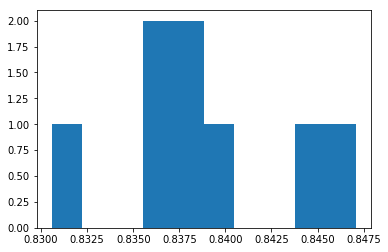

In [29]:
plt.hist(percentual)

### Análise

Analisando os resultados obtidos é possível concluir que o classificador conseguiu um total de acertos de aproximadamente 83% dos negativos verdadeiros ou seja: Marcou como não spam emails que não são spam, o que pode ser considerado um bom resultado mas com espaço para melhoras. Em contrapartida, o mesmo obteve apenas 1% de acerto para positivos verdadeiros, que são emails marcados como spam e são de fato spam.

Quando maior a base de dados melhor funciona o classificador Naive-Bayes, portanto, a acurácia do modelo apresentado poderia ter sido melhorada utilizando uma base de dados ainda maior.

Um dos fatores mais importantes que comprovam o sucesso, em parte, do modelo implementado é a baixa porcentagem de falsos positivos (cerca de 2%). Os falsos positivos classificam um não spam como spam, o que pode representar insatisfação dos usuários. 

Um ponto preocupante é a porcentagem de cerca de 13% para os falsos negativos que podem ser extremamente prejudiciais para o classificador, umas vez que marcam como não spam, um email que é spam. 

Desta forma, pensando em um ambiente empresarial, onde o objetivo é a satisfação do cliente (para que se possa obter lucro), os falsos positivos e negativo devem ter probabilidades muito baixas.

Uma das desvantagens de se trabalhar com uma única divisão da base de dados em treinamento
e  teste é que não é possível obter confiança elevada no modelo, já que as definições e palavras que são frequentes em emails de spam podem mudar diariamente, considerando o alto fluxo de dados na rede, tornando o classificar desatualizado rapidamente.
